In [3]:
import pandas as pd
from tqdm import tqdm
import networkx as nx
from bs4 import BeautifulSoup

# Preprocessing

In [2]:
df = pd.read_pickle("metadata.pkl")

In [9]:
df["title"] = df["title"].apply(lambda x: BeautifulSoup(str(x).lower(), "lxml").text)

/tmp/ipykernel_5802/3788218982.py:1: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  df["title"] = df["title"].apply(lambda x: BeautifulSoup(str(x).lower(), "lxml").text)


In [10]:
df["abstract"] = df["abstract"].apply(lambda x: BeautifulSoup(str(x).lower(), "lxml").text)

/tmp/ipykernel_5802/4135695934.py:1: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  df["abstract"] = df["abstract"].apply(lambda x: BeautifulSoup(str(x).lower(), "lxml").text)


In [31]:
repeated_titles = (df["title"].value_counts() > 1).to_frame()
repeated_titles = list(repeated_titles[repeated_titles["count"]].reset_index(drop=False)["title"].values)
repeated_titles

['nan',
 'erratum',
 'errata',
 'preface',
 'introduction',
 'editorial',
 'discussion',
 'foreword',
 'advances in chemical physics',
 'quantum mechanics',
 'planck2015 results',
 'article',
 'planckintermediate results',
 'front cover',
 'atomic data from the iron project',
 'general discussion',
 'superconductivity',
 'quasicrystals',
 'the amateur scientist',
 'addendum',
 'dielectronic recombination data for dynamic finite-density plasmas',
 'liquid crystals',
 'carbon nanotubes',
 'corrigendum',
 'partial differential equations',
 'theory of superconductivity',
 'correspondence',
 'editorial: promoting inclusive and respectful communications',
 'stochastic differential equations',
 'erratum notice',
 'quantum field theory',
 'table of contents',
 'review of particle properties',
 'studies in protein metabolism',
 'mathematical games',
 'quantum computing',
 'double beta decay',
 'full length article',
 'statistical mechanics',
 'the vimos public extragalactic redshift survey (vip

In [32]:
len(repeated_titles)

16858

In [33]:
repeated_dois = (df["doi"].value_counts() > 1).to_frame()
repeated_dois = list(repeated_dois[repeated_dois["count"]].reset_index(drop=False)["doi"].values)
repeated_dois

['https://doi.org/10.1126/science',
 'https://doi.org/10.1103/physreva.41.5243',
 'https://doi.org/10.1051/0004-6361/201322780',
 'https://doi.org/10.1103/physrevlett.72.1572',
 'https://doi.org/10.1103/physreva.51.3534',
 'https://doi.org/10.1051/0004-6361/201015844',
 'https://doi.org/10.1103/physrevlett.97.202003',
 'https://doi.org/10.1051/0004-6361/201219398',
 'https://doi.org/10.1242/jeb.47.2.267',
 'https://doi.org/10.1103/physrevb.49.13075',
 'https://doi.org/10.1093/bioinformatics/btr602',
 'https://doi.org/10.1242/jeb.199.1.129',
 'https://doi.org/10.12942/lrr-2003-4',
 'https://doi.org/10.1103/physreva.42.5763',
 'https://doi.org/10.1051/0004-6361/201425301',
 'https://doi.org/10.1051/0004-6361/200913565',
 'https://doi.org/10.1103/physreva.73.063622',
 'https://doi.org/10.1038/nmat2325',
 'https://doi.org/10.1103/physrevb.44.5299',
 'https://doi.org/10.1016/j.nuclphysbps.2011.06.021',
 'https://doi.org/10.1103/physrevd.92.055004',
 'https://doi.org/10.1086/307363',
 'https

In [34]:
df = df[~df["title"].isin(repeated_titles)]
df = df[~df["doi"].isin(repeated_dois)].reset_index(drop=True)

In [4]:
df["high_confidence_concept"] = df["concepts"].apply(lambda x: (eval(x)[0][1] > 0.95) if isinstance(x, str) else False)

In [9]:
df = df[(df["abstract"].notna()) & (df["title"].notna()) & (df["referenced_works_count"].notna())]

In [21]:
df["referenced_works_count"] = pd.to_numeric(df["referenced_works_count"], errors="coerce")

In [22]:
df = df[(df["abstract"].notna()) & (df["title"].notna()) & (df["referenced_works_count"].notna())]

In [23]:
df = df[df["referenced_works_count"].astype(int) > 0]

In [27]:
df["referenced_works_count"] = df["referenced_works_count"].astype("int32")

In [32]:
#df.to_pickle("metadata_full_filtered.pkl", compression={'method': 'gzip', 'compresslevel': 3, 'mtime': 1})

In [34]:
df

,doi,id,abstract,title,publication_date,type,type_crossref,keywords,first_author,all_authors,all_authors_af,language,referenced_works,referenced_works_count,related_works,concepts,is_accepted,is_published,high_confidence_concept
0,https://doi.org/10.1103/physrevlett.26.192,https://openalex.org/W2050313003,tunneling measurements on junctions between ve...,spin-dependent tunneling into ferromagnetic ni...,1971-01-25,article,journal-article,"['nickel', 'spin-dependent']",P. M. Tedrow,"['P. M. Tedrow', 'R. Meservey']","['Francis Bitter National Magnet Laboratory, M...",en,"['https://openalex.org/W1966010108', 'https://...",12,"['https://openalex.org/W1998765608', 'https://...","[('Condensed matter physics', 0.8544545), ('Qu...",False,False,False
1,https://doi.org/10.1103/physreve.92.012819,https://openalex.org/W1758342214,inspired by the fact that people have diverse ...,competition and cooperation among different pu...,2015-07-27,article,journal-article,"['different punishing strategies', 'competitio...",Xiaojie Chen,"['Xiaojie Chen', 'Attila Szolnoki', 'Matjaž Pe...","['School of Mathematical Sciences, University ...",en,"['https://openalex.org/W748497126', 'https://o...",43,"['https://openalex.org/W2996115615', 'https://...","[('Public goods game', 0.79590267), ('Competit...",False,False,False
2,https://doi.org/10.1103/physrev.123.968,https://openalex.org/W2040287172,the scattering matrix for compound nucleus pro...,theory of average neutron reaction cross secti...,1961-08-01,article,journal-article,"['cross sections', 'resonance']",P.A. Moldauer,['P.A. Moldauer'],"['Argonne National Laboratory, Argonne, Illino...",en,"['https://openalex.org/W1965366397', 'https://...",19,"['https://openalex.org/W2063585241', 'https://...","[('Physics', 0.75732374), ('Resonance (particl...",False,False,False
3,https://doi.org/10.1103/physrevlett.86.4536,https://openalex.org/W1973501299,"the instability, dynamics, and morphological t...",templating of thin films induced by dewetting ...,2001-05-14,article,journal-article,"['thin films', 'surfaces']",Kajari Kargupta,"['Kajari Kargupta', 'Ashutosh Sharma']","['Department of Chemical Engineering, Indian I...",en,"['https://openalex.org/W1514074674', 'https://...",23,"['https://openalex.org/W2236704256', 'https://...","[('Dewetting', 0.96603024), ('Instability', 0....",False,False,True
4,https://doi.org/10.1103/physrevlett.105.235502,https://openalex.org/W1535924615,the energy of arbitrary graphene edge is deriv...,graphene edge from armchair to zigzag: the ori...,2010-12-03,article,journal-article,"['nanotube chirality', 'graphene', 'edge']",Yuanyue Liu,"['Yuanyue Liu', 'Alex Dobrinsky', 'Boris I. Ya...",['Department of Mechanical Engineering & Mater...,en,"['https://openalex.org/W1992192511', 'https://...",25,"['https://openalex.org/W2318938206', 'https://...","[('Zigzag', 0.89218235), ('Graphene', 0.879921...",False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2059783,https://doi.org/10.1016/s0921-4526(99)02691-5,https://openalex.org/W2045889366,few genuine organic bulk-ferromagnets have bee...,pressure-induced enhancement of tc in a genuin...,2000-07-01,article,journal-article,"['tc', 'pressure-induced', 'bulk-ferromagnet']",M Mito,"['M Mito', 'T Kawae', 'A Ikegami', 'M Hitaka',...","['Faculty of Engineering, Kyushu University, H...",en,"['https://openalex.org/W1972185364', 'https://...",6,"['https://openalex.org/W1802184100', 'https://...","[('Ferromagnetism', 0.9173384), ('Antiferromag...",False,False,False
2059784,https://doi.org/10.1159/000077866,https://openalex.org/W2077739444,flagella are extremely effective organelles of...,dual flagellar systems enable motility under d...,2004-01-01,article,journal-article,"['motility', 'systems']",Linda L. McCarter,['Linda L. McCarter'],"['Department of Microbiology, The University o...",en,"['https://openalex.org/W1978139448', 'https://...",7,"['https://openalex.org/W2160068301', 'https://...","[('Flagell

In [4]:
df = pd.read_pickle("metadata_full_filtered.pkl")

# EDA

<Axes: xlabel='publication_date'>

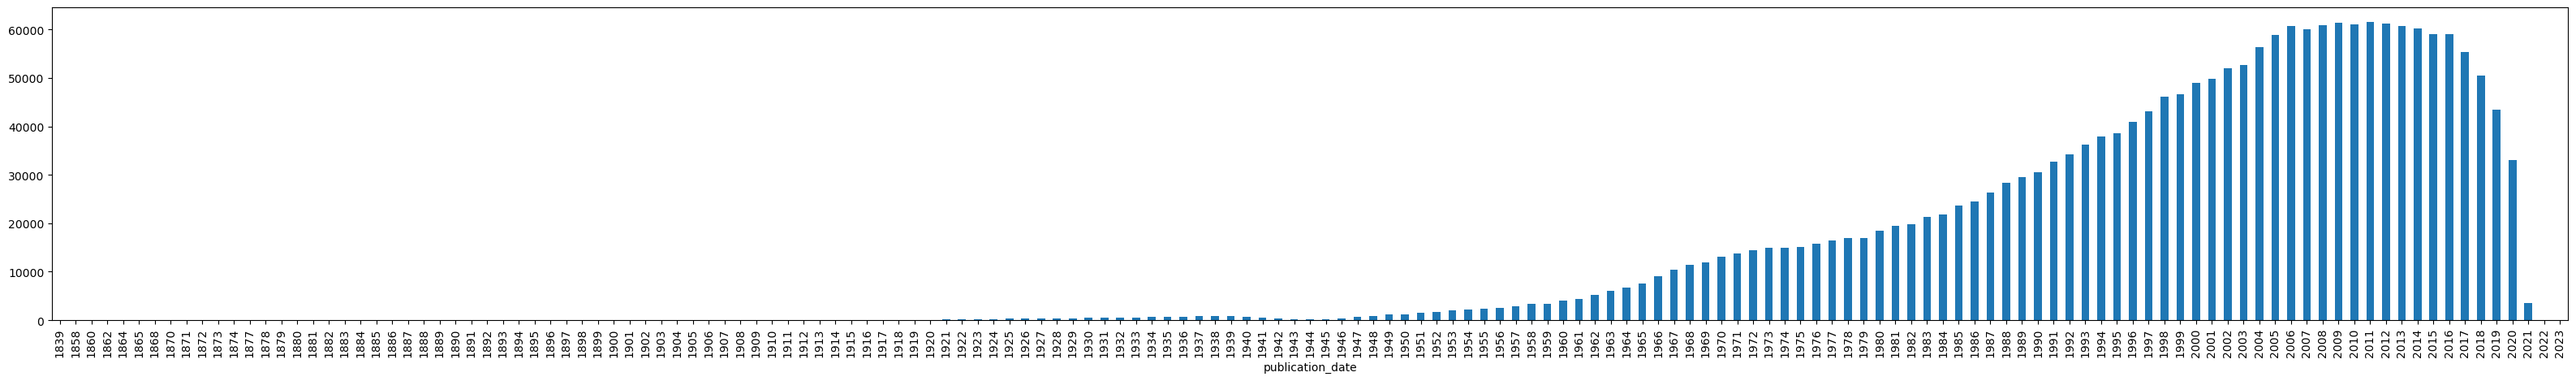

In [5]:
df["publication_date"].apply(lambda x: x[:4]).value_counts().sort_index().plot.bar(figsize=(40,5))

In [6]:
len(df[df["high_confidence_concept"]]) / len(df)

0.07843234352273147

In [8]:
100 * df["language"].value_counts() / len(df)

language
en       99.462032
fr        0.292117
de        0.217255
it        0.003398
es        0.003107
ro        0.002573
ca        0.001893
ru        0.001602
pt        0.001359
et        0.000631
sv        0.000583
uk        0.000583
ja        0.000583
no        0.000534
tl        0.000388
vi        0.000340
nl        0.000340
da        0.000291
so        0.000243
cy        0.000243
af        0.000194
tr        0.000146
hu        0.000097
ko        0.000097
hr        0.000097
zh-cn     0.000049
pl        0.000049
sl        0.000049
id        0.000049
Name: count, dtype: float64

In [9]:
df

,doi,id,abstract,title,publication_date,type,type_crossref,keywords,first_author,all_authors,all_authors_af,language,referenced_works,referenced_works_count,related_works,concepts,is_accepted,is_published,high_confidence_concept
0,https://doi.org/10.1103/physrevlett.26.192,https://openalex.org/W2050313003,tunneling measurements on junctions between ve...,spin-dependent tunneling into ferromagnetic ni...,1971-01-25,article,journal-article,"['nickel', 'spin-dependent']",P. M. Tedrow,"['P. M. Tedrow', 'R. Meservey']","['Francis Bitter National Magnet Laboratory, M...",en,"['https://openalex.org/W1966010108', 'https://...",12,"['https://openalex.org/W1998765608', 'https://...","[('Condensed matter physics', 0.8544545), ('Qu...",False,False,False
1,https://doi.org/10.1103/physreve.92.012819,https://openalex.org/W1758342214,inspired by the fact that people have diverse ...,competition and cooperation among different pu...,2015-07-27,article,journal-article,"['different punishing strategies', 'competitio...",Xiaojie Chen,"['Xiaojie Chen', 'Attila Szolnoki', 'Matjaž Pe...","['School of Mathematical Sciences, University ...",en,"['https://openalex.org/W748497126', 'https://o...",43,"['https://openalex.org/W2996115615', 'https://...","[('Public goods game', 0.79590267), ('Competit...",False,False,False
2,https://doi.org/10.1103/physrev.123.968,https://openalex.org/W2040287172,the scattering matrix for compound nucleus pro...,theory of average neutron reaction cross secti...,1961-08-01,article,journal-article,"['cross sections', 'resonance']",P.A. Moldauer,['P.A. Moldauer'],"['Argonne National Laboratory, Argonne, Illino...",en,"['https://openalex.org/W1965366397', 'https://...",19,"['https://openalex.org/W2063585241', 'https://...","[('Physics', 0.75732374), ('Resonance (particl...",False,False,False
3,https://doi.org/10.1103/physrevlett.86.4536,https://openalex.org/W1973501299,"the instability, dynamics, and morphological t...",templating of thin films induced by dewetting ...,2001-05-14,article,journal-article,"['thin films', 'surfaces']",Kajari Kargupta,"['Kajari Kargupta', 'Ashutosh Sharma']","['Department of Chemical Engineering, Indian I...",en,"['https://openalex.org/W1514074674', 'https://...",23,"['https://openalex.org/W2236704256', 'https://...","[('Dewetting', 0.96603024), ('Instability', 0....",False,False,True
4,https://doi.org/10.1103/physrevlett.105.235502,https://openalex.org/W1535924615,the energy of arbitrary graphene edge is deriv...,graphene edge from armchair to zigzag: the ori...,2010-12-03,article,journal-article,"['nanotube chirality', 'graphene', 'edge']",Yuanyue Liu,"['Yuanyue Liu', 'Alex Dobrinsky', 'Boris I. Ya...",['Department of Mechanical Engineering & Mater...,en,"['https://openalex.org/W1992192511', 'https://...",25,"['https://openalex.org/W2318938206', 'https://...","[('Zigzag', 0.89218235), ('Graphene', 0.879921...",False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2059783,https://doi.org/10.1016/s0921-4526(99)02691-5,https://openalex.org/W2045889366,few genuine organic bulk-ferromagnets have bee...,pressure-induced enhancement of tc in a genuin...,2000-07-01,article,journal-article,"['tc', 'pressure-induced', 'bulk-ferromagnet']",M Mito,"['M Mito', 'T Kawae', 'A Ikegami', 'M Hitaka',...","['Faculty of Engineering, Kyushu University, H...",en,"['https://openalex.org/W1972185364', 'https://...",6,"['https://openalex.org/W1802184100', 'https://...","[('Ferromagnetism', 0.9173384), ('Antiferromag...",False,False,False
2059784,https://doi.org/10.1159/000077866,https://openalex.org/W2077739444,flagella are extremely effective organelles of...,dual flagellar systems enable motility under d...,2004-01-01,article,journal-article,"['motility', 'systems']",Linda L. McCarter,['Linda L. McCarter'],"['Department of Microbiology, The University o...",en,"['https://openalex.org/W1978139448', 'https://...",7,"['https://openalex.org/W2160068301', 'https://...","[('Flagell

In [ ]:
network = {}
all_nodes = set(df["id"].tolist())
for _, x in df.iterrows():
    id = x["id"]
    ref = x["referenced_works"]
    if isinstance(ref, str):
        ev = eval(ref)
        if isinstance(ev, List) and len(ev) > 0:
            network[id] = set(ev).intersection(all_nodes)

In [26]:
print(df[df["high_confidence_concept"]].iloc[0:5]["abstract"].values)

['the instability, dynamics, and morphological transitions of patterns in thin liquid films on chemically heterogeneous striped surfaces are investigated based on 3d nonlinear simulations. the film breakup is suppressed on some potentially destabilizing nonwettable sites when their spacing is below a characteristic length scale of the instability, lambda(h). the thin film pattern replicates the substrate surface energy pattern closely only when (i) the periodicity of substrate pattern lies between lambda(h) and 2lambda(h), and (ii) the stripe width is within a range bounded by a lower critical length, below which no heterogeneous rupture occurs, and an upper transition length above which complex morphological features unlike the substrate pattern are formed.'
 "the dilaton free energy density in external static gravitational field is found. we use the real time formulation of the finite temperature field theory and the free energy density is computed to the first order of the string pa

In [30]:
from random import random

In [27]:
print(df[df["high_confidence_concept"]].iloc[0:5]["concepts"].apply(lambda x: [m[0] for m in eval(x)]).values)

[list(['Dewetting', 'Instability', 'Breakup', 'Substrate (aquarium)', 'Materials science', 'Pattern formation', 'Thin film', 'Lambda', 'Length scale', 'Condensed matter physics', 'Chemical physics', 'Optics', 'Molecular physics', 'Nanotechnology', 'Physics', 'Mechanics', 'Oceanography', 'Geology', 'Biology', 'Genetics'])
 list(['Dilaton', 'Physics', 'Gravitation', 'Energy density', 'Gravitational field', 'Einstein', 'Thermal', 'String (physics)', 'Quantum electrodynamics', 'Classical mechanics', 'Gravitational energy', 'Mathematical physics', 'Theoretical physics', 'Thermodynamics'])
 list(['Overtone', 'Anharmonicity', 'Delocalized electron', 'Phonon', 'Spectroscopy', 'Overtone band', 'Dispersion (optics)', 'Molecular physics', 'Condensed matter physics', 'Surface phonon', 'Molecular vibration', 'Physics', 'Atomic physics', 'Materials science', 'Spectral line', 'Molecule', 'Excited state', 'Quantum mechanics'])
 list(['Pseudogap', 'Physics', 'Superconductivity', 'Condensed matter physi

In [31]:
print(df[df["high_confidence_concept"]].iloc[0:5]["concepts"].apply(lambda x: sorted([m[0] for m in eval(x)], key=lambda x: random())).values)

[list(['Thin film', 'Chemical physics', 'Optics', 'Materials science', 'Substrate (aquarium)', 'Genetics', 'Length scale', 'Pattern formation', 'Dewetting', 'Condensed matter physics', 'Lambda', 'Breakup', 'Oceanography', 'Nanotechnology', 'Biology', 'Physics', 'Molecular physics', 'Mechanics', 'Geology', 'Instability'])
 list(['Einstein', 'Gravitation', 'Dilaton', 'Gravitational field', 'Theoretical physics', 'Energy density', 'String (physics)', 'Mathematical physics', 'Quantum electrodynamics', 'Classical mechanics', 'Thermodynamics', 'Thermal', 'Gravitational energy', 'Physics'])
 list(['Physics', 'Dispersion (optics)', 'Phonon', 'Molecule', 'Overtone band', 'Excited state', 'Spectral line', 'Delocalized electron', 'Condensed matter physics', 'Atomic physics', 'Materials science', 'Surface phonon', 'Molecular physics', 'Spectroscopy', 'Molecular vibration', 'Overtone', 'Anharmonicity', 'Quantum mechanics'])
 list(['Condensed matter physics', 'Cuprate', 'Superconductivity', 'Materia

In [20]:
len(network_filtered.keys())

2366701

In [5]:
!pip install --upgrade transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 kB 384.4 kB/s eta 0:00:00 kB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 6.9 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 330.1/330.1 kB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 17.1 MB/s eta 0:00:0031m18.4 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 21.3 MB/s eta 0:00:0031m22.0 MB/s eta 0:00:01
  Attempting uninstall: safetensors
    Found existing installation: safetensors 0.4.0
    Uninstalling safetensors-0.4.0:
      Successfully uninstalled safetensors-0.4.0
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.15.1
    Uninstalling huggingface-hub-0.15.1:
      Successfully uninstalled huggingface-hub-0.15.1
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.13.3
    Uninstalling tokenizers-0.13.3:
      Successfully uninstalled tokeniz

In [10]:
from transformers import AutoModelForCausalLM, AutoTokenizer
import torch
model = AutoModelForCausalLM.from_pretrained("bhavinjawade/SOLAR-10B-OrcaDPO-Jawade", device_map="auto", torch_dtype=torch.float16)
tokenizer = AutoTokenizer.from_pretrained("bhavinjawade/SOLAR-10B-OrcaDPO-Jawade")

Loading checkpoint shards:   0%|          | 0/5 [00:00<?, ?it/s]

In [ ]:
TASK = """
You are a ranking system for sorting a list of scientific concepts related to a paper abstract.

Given a paper abstract and a random list of scientific concepts, you will sort the list by the most related to the least related to the abstract. 
As input, you will receive queries in the following format:

QUERY_START
ABSTRACT:
"inspired by the fact that people have diverse propensities to punish wrongdoers, we study a spatial public goods game with defectors and different types of punishing cooperators. during the game, cooperators punish defectors with class-specific probabilities and subsequently share the associated costs of sanctioning. we show that in the presence of different punishing cooperators the highest level of public cooperation is always attainable through a selection mechanism. interestingly, the selection does not necessarily favor the evolution of punishers who would be able to prevail on their own against the defectors, nor does it always hinder the evolution of punishers who would be unable to prevail on their own. instead, the evolutionary success of punishing strategies depends sensitively on their invasion velocities, which in turn reveals fascinating examples of both competition and cooperation among them. furthermore, we show that under favorable conditions, when punishment is not strictly necessary for the maintenance of public cooperation, the less aggressive, mild form of sanctioning is the sole victor of the selection process. our work reveals that natural strategy selection cannot only promote, but sometimes also hinders competition among prosocial strategies."

CONCEPTS:
['Repeated game', 'Artificial intelligence', 'Public good', 'Strong reciprocity', 'Process (computing)', 'Natural selection', 'Microeconomics', 'Psychology', 'Ecology', 'Prosocial behavior', 'Public goods game', 'Evolutionarily stable strategy', 'Mechanism (biology)', 'Game theory', 'Social psychology', 'Philosophy', 'Competition (biology)', 'Epistemology', 'Economics', 'Punishment (psychology)', 'Computer science', 'Altruism (biology)', 'Biology', 'Operating system', 'Selection (genetic algorithm)']

QUERY_END

In a correct response you are NOT allowed to add or remove concepts from the given list, just to sort the scientific concepts, from the most related to the least related to the abstract. 
Failure in following this format will imply in harsh punishments.

As output it is expected the following response, given the example query above:

RESPONSE_START
SORTED_CONCEPTS:
['Public goods game', 'Competition (biology)', 'Punishment (psychology)', 'Public good', 'Selection (genetic algorithm)', 'Microeconomics', 'Prosocial behavior', 'Mechanism (biology)', 'Economics', 'Altruism (biology)', 'Evolutionarily stable strategy', 'Strong reciprocity', 'Process (computing)', 'Natural selection', 'Game theory', 'Repeated game', 'Computer science', 'Social psychology', 'Psychology', 'Biology', 'Ecology', 'Philosophy', 'Epistemology', 'Artificial intelligence', 'Operating system']
RESPONSE_END
"""

QUERY = """
QUERY_START
ABSTRACT:
"we investigated the self-induced inverse spin hall effect in ferromagnets. temperature ($t$), thickness ($t$), and angular-dependent measurements of transverse voltage in spin pumping experiments were performed with permalloy films. results revealed nonmonotonous $t$ dependence of the self-induced transverse voltage. qualitative agreement was found with first-principles calculations unravelling the skew scattering, side-jump, and intrinsic contributions to the $t$-dependent spin hall conductivity. experimental data were similar whatever the material in contact with permalloy (oxides or metals), and revealed an increase of produced current with $t$, demonstrating a bulk origin of the effect."

CONCEPTS:
['Inverse', 'Condensed matter physics', 'Hall effect', 'Geometry', 'Magnetic field', 'Quantum mechanics', 'Spin Hall effect', 'Thermodynamics', 'Spin polarization', 'Physics', 'Permalloy', 'Scattering', 'Structural engineering', 'Engineering', 'Magnetization', 'Mathematics', 'Spin (aerodynamics)', 'Ferromagnetism', 'Transverse plane', 'Electrical resistivity and conductivity', 'Materials science', 'Electron']

QUERY_END
"""

In [15]:
TASK = """
You are a ranking system for sorting a list of scientific concepts related to a paper abstract.

Given a paper abstract you will create a list of concepts sorted by the most related to the least related to the abstract. 
As input, you will receive queries in the following format:

QUERY_START
ABSTRACT:
"inspired by the fact that people have diverse propensities to punish wrongdoers, we study a spatial public goods game with defectors and different types of punishing cooperators. during the game, cooperators punish defectors with class-specific probabilities and subsequently share the associated costs of sanctioning. we show that in the presence of different punishing cooperators the highest level of public cooperation is always attainable through a selection mechanism. interestingly, the selection does not necessarily favor the evolution of punishers who would be able to prevail on their own against the defectors, nor does it always hinder the evolution of punishers who would be unable to prevail on their own. instead, the evolutionary success of punishing strategies depends sensitively on their invasion velocities, which in turn reveals fascinating examples of both competition and cooperation among them. furthermore, we show that under favorable conditions, when punishment is not strictly necessary for the maintenance of public cooperation, the less aggressive, mild form of sanctioning is the sole victor of the selection process. our work reveals that natural strategy selection cannot only promote, but sometimes also hinders competition among prosocial strategies."
QUERY_END

In a correct response you are expected to yield a list of, AT MAXIMUM 10, scientific concepts sorted from the most related to the least related to the abstract. 
Failure in following this format will imply in harsh punishments.

As output it is expected the following response, given the example query above:

RESPONSE_START
SORTED_CONCEPTS:
['Public goods game', 'Competition (biology)', 'Punishment (psychology)', 'Public good', 'Selection (genetic algorithm)', 'Microeconomics', 'Prosocial behavior', 'Mechanism (biology)', 'Economics', 'Altruism (biology)']
RESPONSE_END
"""

QUERY = """
QUERY_START
ABSTRACT:
"we investigated the self-induced inverse spin hall effect in ferromagnets. temperature ($t$), thickness ($t$), and angular-dependent measurements of transverse voltage in spin pumping experiments were performed with permalloy films. results revealed nonmonotonous $t$ dependence of the self-induced transverse voltage. qualitative agreement was found with first-principles calculations unravelling the skew scattering, side-jump, and intrinsic contributions to the $t$-dependent spin hall conductivity. experimental data were similar whatever the material in contact with permalloy (oxides or metals), and revealed an increase of produced current with $t$, demonstrating a bulk origin of the effect."
QUERY_END
"""

In [16]:
message = [
    {"role": "system", "content": TASK},
    {"role": "user", "content": QUERY}
]
prompt = tokenizer.apply_chat_template(message, add_generation_prompt=True, tokenize=False)

In [17]:
import transformers
pipeline = transformers.pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer
)

In [18]:
sequences = pipeline(
      prompt,
      do_sample=True,
    temperature=0.1,
       top_p=0.9,
       num_return_sequences=1,
       max_length=1500,
   )
print(sequences[0]['generated_text'])

### System:

You are a ranking system for sorting a list of scientific concepts related to a paper abstract.

Given a paper abstract you will create a list of concepts sorted by the most related to the least related to the abstract. 
As input, you will receive queries in the following format:

QUERY_START
ABSTRACT:
"inspired by the fact that people have diverse propensities to punish wrongdoers, we study a spatial public goods game with defectors and different types of punishing cooperators. during the game, cooperators punish defectors with class-specific probabilities and subsequently share the associated costs of sanctioning. we show that in the presence of different punishing cooperators the highest level of public cooperation is always attainable through a selection mechanism. interestingly, the selection does not necessarily favor the evolution of punishers who would be able to prevail on their own against the defectors, nor does it always hinder the evolution of punishers who wo

In [37]:
response = ['Thin film', 'Pattern formation', 'Instability', 'Dewetting', 'Condensed matter physics', 'Breakup', 'Length scale', 'Simulation', 'Chemical physics', 'Materials science', 'Substrate (aquarium)', 'Surface energy', 'Nonlinear', '3D', 'Lambda', 'Physics', 'Optics', 'Nanotechnology', 'Genetics', 'Biology']
expected = ['Dewetting', 'Instability', 'Breakup', 'Substrate (aquarium)', 'Materials science', 'Pattern formation', 'Thin film', 'Lambda', 'Length scale', 'Condensed matter physics', 'Chemical physics', 'Optics', 'Molecular physics', 'Nanotechnology', 'Physics', 'Mechanics', 'Oceanography', 'Geology', 'Biology', 'Genetics']

In [38]:
assert len(response) == len(expected)

In [ ]:
dic 

In [ ]:
"""
['Condensed matter physics', 
'Quantum tunnelling', 
'Ferromagnetism', 
'Spin polarization', 
'Materials science', 
'Nickel', 
'Magnetic field', 
'Magnetic moment', 
'Spin (aerodynamics)', 
'Superconductivity', 
'Spin polarized scanning tunneling microscopy', 
'Scanning tunneling spectroscopy', 
'Physics', 
'Electron', 
'Quantum mechanics', 
'Metallurgy', 
'Thermodynamics']
"""

In [3]:
import gc; gc.enable();
del network
gc.collect()

NameError: name 'network' is not defined

In [31]:
g = nx.DiGraph(network_filtered)

In [2]:
g = nx.read_adjlist("citation_net.nx")

In [7]:
import random
k = 10
sampled_nodes = random.sample(g.nodes, k)
sampled_graph = g.subgraph(sampled_nodes)

/tmp/ipykernel_76122/4193713747.py:3: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  sampled_nodes = random.sample(g.nodes, k)


In [9]:
from torch_geometric.utils.convert import from_networkx

In [ ]:
pyg_graph = from_networkx(g)

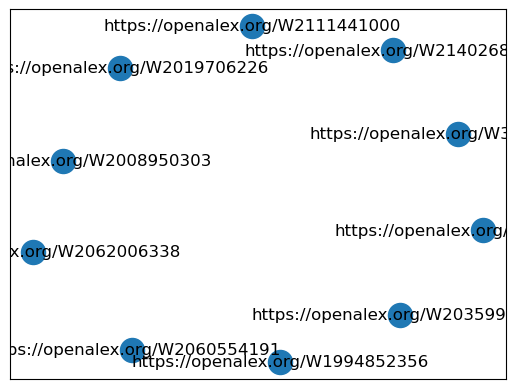

In [8]:
nx.draw_networkx(sampled_graph)

In [41]:
concepts_all = []
for c in concepts:
    concepts_all.extend([x[0] for x in c])

In [43]:
concepts_all = set(concepts_all)

In [45]:
concepts_all

{'Biological soil crust',
 'Data envelopment analysis',
 'Bombyx mori',
 'Desoxyribonucleic acid',
 'Retinol',
 'Cosmological perturbation theory',
 'Synthon',
 'Basis function',
 'Buffer strip',
 'Biexciton',
 'Chimeric antigen receptor',
 'Mammillary body',
 'Ligase chain reaction',
 'Transistor',
 'Prenatal development',
 'Quasi-Zenith Satellite System',
 'Cracking',
 'Sierra leone',
 'Karl popper',
 'Soil respiration',
 'Radio occultation',
 'Economic potential',
 'GLI2',
 'Photon',
 'Parallel metaheuristic',
 'Galactose',
 'Rotary encoder',
 'Congo red',
 'Dry land',
 'Infrared microscopy',
 'Disodium cromoglycate',
 'Psychosocial',
 'Protein adsorption',
 'Activities of daily living',
 'Intermembrane space',
 'Dielectric resonator',
 'Breaking wave',
 'Mercalli intensity scale',
 'Aminomethylphosphonic acid',
 'Chloride',
 'Thermal infrared',
 'Strength of a graph',
 'Pickering emulsion',
 'Event-related potential',
 'Cognitive reserve',
 'Thermal equilibrium',
 'Dynamin',
 'Bent

In [46]:
del concepts

In [65]:
import gc; gc.enable; gc.collect()

656